In [188]:
# 5 ВАРИАНТ
from sympy import *
import sympy as sp
import numpy as np

x = Symbol('x')
I = integrate(x**3*exp(x),x)
pprint(I)

⎛ 3      2          ⎞  x
⎝x  - 3⋅x  + 6⋅x - 6⎠⋅ℯ 


Упражнение 1: вычислить следующие интегралы 
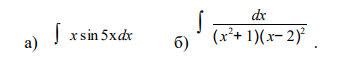

In [189]:
# a)
I = integrate(x*sin(5*x), x)
pprint(I)

  x⋅cos(5⋅x)   sin(5⋅x)
- ────────── + ────────
      5           25   


In [190]:
# b)
I = integrate(1 / ((x**2 + 1) * ((x-2)**2)), x)
pprint(I)

                      ⎛ 2    ⎞                       
  4⋅log(x - 2)   2⋅log⎝x  + 1⎠   3⋅atan(x)      1    
- ──────────── + ───────────── + ───────── - ────────
       25              25            25      5⋅x - 10


Упражнение 2. Вычислить определённые интегралы в символьном виде: 
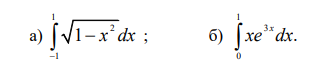

In [34]:
# a)
I = integrate(sqrt(1 - x**2), (x, -1, 1))
pprint(I)

π
─
2


In [6]:
# b)
I = integrate(x * (exp(3*x)), (x, 0, 1))
pprint(I)

       3
1   2⋅ℯ 
─ + ────
9    9  


Упражнение 3. Создать функции, вычисляющие значения интегральных сумм на отрезке [a; b] при равномерном разбиении его
на n отрезков и выбором точек на (использовать пакеты numpy и scipy):

а) левых концах отрезков разбиения;
б) правых концах отрезков разбиения. 

Проверить работу функций, сопоставив результат выполнения программы и результат, полученный вручную, для интегральных сумм функции 
f(x) = x на отрезке [1; 2] при разбиении его на четыре равных части.


In [222]:
import scipy.integrate as integrate

def r_sum(f, a, b, n):
    s = 0.0
    dx = (b - a) / float(n)

    while(a < b):
        a += dx
        ds = f(a)*dx
        s += ds
    
    return s

def l_sum(f, a, b, n):
    s = 0.0
    dx = (b - a) / float(n)

    while(a < b):
        ds = f(a)*dx
        a += dx
        s += ds

    return s


func = lambda x: x

I = integrate.quad(func, 1, 2)
I_right = r_sum(func, 1, 2, 4)
I_left = l_sum(func, 1, 2, 4)

print(f"Integral: {I[0]}\nRight sum: {I_right}\nLeft sum: {I_left}")


Integral: 1.5
Right sum: 1.625
Left sum: 1.375


Упражнение 4. 
Создать функции, вычисляющие значения верхних и нижних сумм Дарбу на отрезках [a; b]
при равномерном разбиении его на n отрезков.

Проверить работу функций, сопоставив результат выполнения программы и результат, полученный вручную, для сумм Дарбу функции
для интегральных сумм функции f(x) = x на отрезке [1; 2] при разбиении его на четыре равных части.

In [220]:
def up_darbu(f, a, b, n):
    s = 0.0
    dx = (b - a) / float(n)

    while(a < b):
        ds = max(f(a), f(a+dx)) * dx
        a += dx
        s += ds

    return s

def down_darbu(f, a, b, n):
    s = 0.0
    dx = (b - a) / float(n)

    while(a < b):
        ds = min(f(a), f(a+dx)) * dx
        a += dx
        s += ds

    return s

I = integrate.quad(func, 1, 2)
I_u_d = up_darbu(func, 1, 2, 4)
I_d_d = down_darbu(func, 1, 2, 4)

print(f"Integral: {I[0]}\nUp Darbu sum: {I_u_d}\nDown Darbu sum: {I_d_d}")


AttributeError: 'function' object has no attribute 'quad'

Упражнение 5. Используя функции упр. 3 и 4, вычислить интегральные суммы и суммы Дарбу для
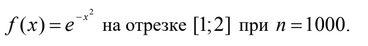

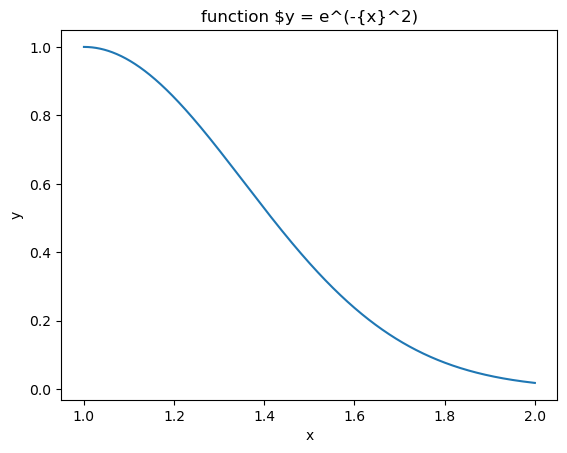

Integral: 0.13525725799149346

Right sum: 0.13510077376131718
Left sum: 0.13545041069806799

Up Darbu sum: 0.13545041069806799
Down Darbu sum: 0.13510077376131718


In [169]:
import matplotlib.pyplot as plt

func = lambda x: np.exp(-(x**2))

x = np.linspace(1, 2, 1000)
y = [func(x*0.002) for x in range(0, 1000)] 
plt.plot(x, y)
plt.xlabel('x')
plt.ylabel('y')
plt.title('function $y = e^(-{x}^2)') # название для графика
plt.show()

I = integrate.simpson(func(x), x)

I_right = r_sum(func, 1, 2, 1000)
I_left = l_sum(func, 1, 2, 1000)

I_u_d = up_darbu(func, 1, 2, 1000)
I_d_d = down_darbu(func, 1, 2, 1000)

print(f"Integral: {I}\n\nRight sum: {I_right}\nLeft sum: {I_left}\n")
print(f"Up Darbu sum: {I_u_d}\nDown Darbu sum: {I_d_d}")

Упражнение 6. Вычислить     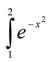     используя функцию integrate.simpson.

Сравнить результат с результатами упражнения 5, вычислив разности между
численным значением интеграла, полученным по формуле Симпсона
(взяв разбиениена 100 интервалов и на 1000), и значениями интегральных сумм и сумм Дарбу.

In [ ]:
x = np.linspace(1,2,1000)#
print(f"Integral: {I}\n__________________________")

I_right = r_sum(func, 1, 2, 1000)
I_left = l_sum(func, 1, 2, 1000)
I_u_d = up_darbu(func, 1, 2, 1000)
I_d_d = down_darbu(func, 1, 2, 1000)

print("Sums for n = 1000:")
print(f"Right sum: {round(I_right, 8)}\t\tLeft sum: {round(I_left, 8)}")
print(f"Difference for right: {abs(I - I_right)}")
print(f"Difference for left: {abs(I - I_left)}\n")
print(f"Up Darbu sum: {round(I_u_d, 8)}\tDown Darbu sum: {round(I_d_d, 8)}")
print(f"Difference for up: {abs(I - I_u_d)}")
print(f"Difference for down: {abs(I - I_d_d)}\n__________________________")

I_right = r_sum(func, 1, 2, 100)
I_left = l_sum(func, 1, 2, 100)
I_u_d = up_darbu(func, 1, 2, 100)
I_d_d = down_darbu(func, 1, 2, 100)

print("Sums for n = 100:")
print(f"Right sum: {round(I_right, 8)}\t\tLeft sum: {round(I_left, 8)}")
print(f"Difference for right: {abs(I - I_right)}")
print(f"Difference for left: {abs(I - I_left)}\n")
print(f"Up Darbu sum: {round(I_u_d, 8)}\tDown Darbu sum: {round(I_d_d, 8)}")
print(f"Difference for up: {abs(I - I_u_d)}")
print(f"Difference for down: {abs(I - I_d_d)}\n")

Упражнение С1. Вычислить интеграл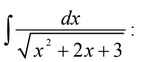 

а) используя средства python;
б) без использования python.

б) Выделяем полный квадрат под корнем (1+x)^2 + 2 --> подстановка u = (x + 1) / sqrt(2) -- > по табличн итегралу: 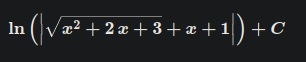

Что аналогично ответу при подстановке в формулу гиперболического арксинуса 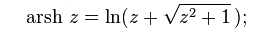


In [192]:
x = Symbol('x')
I = integrate(1/(sp.sqrt(x**2 + 2*x + 3)), x)
pprint(I)

     ⎛√2⋅(x + 1)⎞
asinh⎜──────────⎟
     ⎝    2     ⎠


Упражнение С2. Вычислить определённый интеграл используя символьное вычисление python 
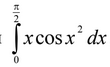

In [197]:
x = Symbol('x')
I = integrate(x*sp.cos(x**2), (x, 0, sp.pi/2))
pprint(I)

   ⎛ 2⎞
   ⎜π ⎟
sin⎜──⎟
   ⎝4 ⎠
───────
   2   


Упражнение С3. Создать функцию, вычисляющую значения интегральных
сумм на отрезке [a; b] при равномерном разбиении его на n отрезков и выбором
точек, делящих отрезки разбиения в произвольном заданном отношении

Проверить работу функции, сопоставив результат выполнения программы и
результат, полученный вручную, для интегральных сумм функции f(x) = x на отрезке [1; 2]
при разбиении его на четыре равных части и выбором точек, делящих отрезки разбиения пополам.

In [208]:
def lambda_sum(f, a, b, n, l):
    s = 0.0
    dx = (b - a) / float(n)
    
    if l < 1:
        delta = dx*l
    else:
        delta = dx - dx/l

    while(a < b):
        ds = f(a + delta)*dx
        a += dx
        s += ds

    return s

func = lambda x: float(x)

I = lambda_sum(func, 1, 2, 2, 0.5)
print(f"Integral sum: {I}")

Integral sum: 1.5


Задание 1. Вычислить значения интегральных сумм функции
на отрезке [a; b] при равномерном разбиении его на n отрезков и выбором в качестве  точек,
делящих отрезки разбиения в указанном отношении .

Рассмотреть
n = 2,4,8,16,...,1024. Результаты представить в виде таблицы.
a = -3;      b = 5;       л = 1/3



In [ ]:
import pandas as pd

table_data = []

func = lambda x: x**2 + 1

for n in range(2, 1026, 2):
    result = lambda_sum(func, -3, 5, n, 1/3)
    table_data.append([n, result])
pd.set_option('display.max_rows', None)

I = integrate.quad(func, -3, 5)

print(f"Integral is: {round(I[0], 8)}")

results_table = pd.DataFrame(table_data, columns=["n", "result"])

display(results_table)


Задание 2. Оценить значение 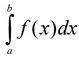 c помощью сумм Дарбу
при разбиении отрезка на n равных частей. Рассмотреть n = 2,4,8,16,...,1024.

Полученными результатами дополнить таблицу из задания 1.

Рассмотреть
n = 2,4,8,16,...,1024. Результаты представить в виде таблицы.
a = -3;      b = 5;       л = 1/3



In [237]:
I_d_d = []
I_u_d = []

for n in range(2, 1026, 2):
    I_d_d.append(down_darbu(func, -3, 5, n))
    I_u_d.append(up_darbu(func, -3, 5, n))

results_table['Down Darbu'] = I_d_d
results_table['Up Darbu'] = I_u_d

display(results_table)

,n,result,Down Darbu,Up Darbu
0,2,40.888889,16.000000,144.000000
1,4,51.555556,32.000000,96.000000
2,6,95.176955,73.185185,138.370370
3,8,55.555556,43.000000,77.000000
4,10,56.248889,45.952000,73.088000
5,12,75.539095,65.333333,92.592593
6,14,72.964043,64.256560,87.113703
7,16,57.222222,50.500000,67.500000
8,18,57.393690,51.379973,66.480110
9,20,57.528889,52.096000,65.664000


Variable                         Type                      Data/Info
--------------------------------------------------------------------
Abs                              FunctionClass             Abs
AccumBounds                      ManagedProperties         <class 'sympy.calculus.ac<...>unds.AccumulationBounds'>
Add                              ManagedProperties         <class 'sympy.core.add.Add'>
Adjoint                          ManagedProperties         <class 'sympy.matrices.ex<...>essions.adjoint.Adjoint'>
AlgebraicField                   type                      <class 'sympy.polys.domai<...>aicfield.AlgebraicField'>
AlgebraicNumber                  ManagedProperties         <class 'sympy.core.numbers.AlgebraicNumber'>
And                              FunctionClass             And
AppliedPredicate                 ManagedProperties         <class 'sympy.assumptions<...>assume.AppliedPredicate'>
Array                            ManagedProperties         <class 'sympy.tensor.arra